In [1]:
spark.version

'3.0.1'

In [2]:
import subprocess

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [6]:
directory = 'gs://msca-bdp-tweets/final_project/'
# file = '*.json'
# path = directory + file
path = directory

In [7]:
cmd = 'hadoop fs -du -s -h ' + directory

p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)
for line in p.stdout.readlines():
    print (line)
    
retval = p.wait()

156.2 G  156.2 G  gs://msca-bdp-tweets/final_project



In [9]:
%%time

tweets_df = spark.read.json(path)

CPU times: user 20.8 ms, sys: 10.6 ms, total: 31.5 ms
Wall time: 2min 47s


In [25]:
data = tweets_df.select([tweets_df.text,
                         tweets_df.coordinates.coordinates.alias('coordinates')])

In [26]:
#create dataframes with strings with covid-related terms
covid_data2 = data.filter((data.text.contains("covid"))\
                          | (data.text.contains("coronavirus"))\
                          | (data.text.contains("pandemic"))\
                          | (data.text.contains("vaccin"))\
                          | (data.text.contains("booster"))\
                          | (data.text.contains("pfizer"))\
                          | (data.text.contains("moderna"))\
                          | (data.text.contains("j&j"))\
                          | (data.text.contains("johnson and johnson")))

In [27]:
covid_data2

text,coordinates
@GarrAarghHrumph ...,null
RT @Denise_Old_La...,null
@pahpcorn @Lisa_T...,null
@polan13 @mark_do...,null
RT @choi_bts2: It...,null
While one can sti...,null
@newsmax Then why...,null
fuck covid,null
RT @WMTWTV: 12 st...,null
RT @MakisMD: You ...,null


In [28]:
import geopandas 
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [29]:
coord = covid_data2.select('coordinates').dropna()

In [30]:
coord = coord.toPandas()

In [31]:
coord['coordinates'] = [tuple(lst) for lst in coord.coordinates]

In [32]:
coord['coordinates'] = coord['coordinates'].apply(Point)

In [35]:
gdf = geopandas.GeoDataFrame(coord, geometry='coordinates')

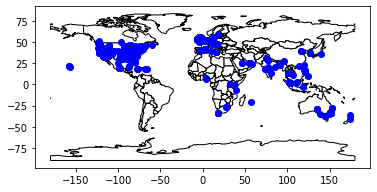

In [36]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='blue')

plt.show()